In [1]:
import pandas as pd
df = pd.read_csv('train.csv')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
a = df.corr()
a.sort_values(by='SalePrice',ascending=False)

,MSSubClass,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,...,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,SalePrice
SalePrice,0.476982,0.696882,0.790982,0.619545,0.535370,0.426997,0.475241,0.682639,0.505503,0.635361,...,0.553851,0.659600,0.537672,0.466929,0.430770,0.535419,0.496031,0.692360,0.623431,1.000000
OverallQual,0.471136,0.667647,1.000000,0.665203,0.552825,0.449358,0.410238,0.726278,0.568969,0.644946,...,0.552153,0.673331,0.423438,0.396765,0.420713,0.574261,0.491404,0.628715,0.562022,0.790982
GrLivArea,0.347673,0.411751,0.593007,0.369635,0.325158,0.248026,0.389893,0.435986,0.282314,0.369656,...,0.613537,0.420563,0.809778,0.461679,0.292680,0.310591,0.319453,0.490960,0.468997,0.708624
Neighborhood,0.532233,1.000000,0.667647,0.683095,0.521638,0.400196,0.368029,0.631870,0.576118,0.629227,...,0.513701,0.566358,0.282979,0.315569,0.456575,0.579489,0.466576,0.585252,0.529629,0.696882
GarageCars,0.397369,0.585252,0.628715,0.570728,0.433995,0.429343,0.404375,0.557218,0.458128,0.545306,...,0.476583,0.535777,0.399737,0.300840,0.264771,0.485292,0.365879,1.000000,0.865866,0.692360
ExterQual,0.393934,0.631870,0.726278,0.638206,0.570870,0.415825,0.349637,1.000000,0.597832,0.638241,...,0.497192,0.716122,0.308004,0.249335,0.378696,0.590883,0.482143,0.557218,0.495778,0.682639
KitchenQual,0.391700,0.566358,0.673331,0.575836,0.611669,0.362377,0.285190,0.716122,0.533146,0.562345,...,0.439960,1.000000,0.295499,0.256409,0.339323,0.536959,0.423690,0.535777,0.489606,0.659600
BsmtQual,0.423389,0.629227,0.644946,0.707715,0.545541,0.393052,0.314065,0.638241,0.621976,1.000000,...,0.523471,0.562345,0.238832,0.227714,0.424760,0.642954,0.525068,0.545306,0.458693,0.635361
GarageArea,0.387789,0.529629,0.562022,0.523139,0.390554,0.380290,0.372567,0.495778,0.398155,0.458693,...,0.416933,0.489606,0.331666,0.269141,0.209133,0.462037,0.301241,0.865866,1.000000,0.623431
YearBuilt,0.572252,0.683095,0.665203,1.000000,0.652419,0.420443,0.298983,0.638206,0.699337,0.707715,...,0.555510,0.575836,0.246057,0.214032,0.519992,0.768672,0.554784,0.570728,0.523139,0.619545


In [4]:
a.sort_values(by='SalePrice',ascending=True)

,MSSubClass,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,...,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,SalePrice
MasVnrType,0.246813,0.400196,0.449358,0.420443,0.310870,1.000000,0.579165,0.415825,0.310319,0.393052,...,0.305025,0.362377,0.194912,0.199416,0.315218,0.343755,0.323321,0.429343,0.380290,0.426997
HeatingQC,0.305789,0.420371,0.457083,0.479935,0.519679,0.245128,0.159256,0.520027,0.519447,0.410107,...,0.342358,0.504228,0.159916,0.129689,0.276766,0.476886,0.376344,0.337794,0.295462,0.427649
GarageType,0.510706,0.456575,0.420713,0.519992,0.387933,0.315218,0.221484,0.378696,0.401139,0.424760,...,0.364099,0.339323,0.203209,0.289770,1.000000,0.387758,0.568232,0.264771,0.209133,0.430770
Fireplaces,0.283353,0.315569,0.396765,0.214032,0.162493,0.199416,0.247906,0.249335,0.113338,0.227714,...,0.244451,0.256409,0.319088,1.000000,0.289770,0.127751,0.269653,0.300840,0.269141,0.466929
MasVnrArea,0.212010,0.368029,0.410238,0.298983,0.193044,0.579165,1.000000,0.349637,0.209916,0.314065,...,0.266274,0.285190,0.280041,0.247906,0.221484,0.229848,0.251678,0.404375,0.372567,0.475241
MSSubClass,1.000000,0.532233,0.471136,0.572252,0.415910,0.246813,0.212010,0.393934,0.445768,0.423389,...,0.329673,0.391700,0.253413,0.283353,0.510706,0.408647,0.438262,0.397369,0.387789,0.476982
GarageFinish,0.438262,0.466576,0.491404,0.554784,0.446760,0.323321,0.251678,0.482143,0.487728,0.525068,...,0.420880,0.423690,0.224545,0.269653,0.568232,0.500379,1.000000,0.365879,0.301241,0.496031
Foundation,0.445768,0.576118,0.568969,0.699337,0.551916,0.310319,0.209916,0.597832,1.000000,0.621976,...,0.462312,0.533146,0.180213,0.113338,0.401139,0.644742,0.487728,0.458128,0.398155,0.505503
YearRemodAdd,0.415910,0.521638,0.552825,0.652419,1.000000,0.310870,0.193044,0.570870,0.551916,0.545541,...,0.452501,0.611669,0.217923,0.162493,0.387933,0.617250,0.446760,0.433995,0.390554,0.535370
GarageYrBlt,0.408647,0.579489,0.574261,0.768672,0.617250,0.343755,0.229848,0.590883,0.644742,0.642954,...,0.497623,0.536959,0.213629,0.127751,0.387758,1.000000,0.500379,0.485292,0.462037,0.535419


In [5]:
X = np.array(df.loc[:, ['OverallQual']])
y1 = np.array(df.loc[:, ['SalePrice']])

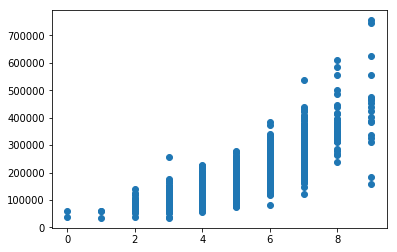

In [6]:
plt.scatter(X, y1)                  
plt.show()                          

In [7]:
y2 = np.array(df.loc[:,["GrLivArea"]])

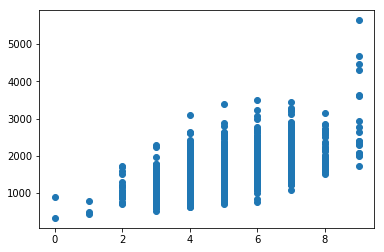

In [8]:
plt.scatter(X,y2)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.3, random_state = 0)

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [11]:
lr.fit(X_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print('R^2')
print('train: %.3f' % lr.score(X_train, y1_train))
print('test : %.3f' % lr.score(X_test, y1_test))

R^2
train: 0.615
test : 0.648


In [13]:
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score


In [14]:
print('adjusted R^2')
print('train: %3f' % adjusted(lr.score(X_train, y1_train), len(y1_train), 2))
print('test : %3f' % adjusted(lr.score(X_test, y1_test), len(y1_test), 2))

adjusted R^2
train: 0.614131
test : 0.646303


In [15]:
X = df.loc[:, ['OverallQual', 'GrLivArea']].values

In [16]:
y = df.loc[:, ['SalePrice']].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
lr.coef_

array([[ 31506.71506056,     61.36857857]])

In [21]:
print('R^2')
print('train: %.3f' % lr.score(X_train, y_train))
print('test : %.3f' % lr.score(X_test, y_test))

R^2
train: 0.724
test : 0.690


In [22]:
dftest = pd.read_csv('test.csv')

In [23]:
Xnew = dftest.loc[:, ['OverallQual', 'GrLivArea']].values

In [24]:
y_pred = lr.predict(Xnew)

In [25]:
y_pred = y_pred.reshape(-1)

In [26]:
a =[i for i in range(1461,2920)]

In [27]:
df1 = pd.DataFrame({'SalePrice':y_pred,'Id': a})

In [28]:
df1

,Id,SalePrice
0,1461,139663.924524
1,1462,197743.234104
2,1463,184647.092614
3,1464,214619.593210
4,1465,257749.603875
5,1466,217749.390717
6,1467,189028.895947
7,1468,206089.360789
8,1469,229986.372107
9,1470,107298.049363
